# Аналитика в Яндекс.Афише

Цель исследования: оптимизировать маркетинговые затраты.<br>
Оптимизацию возможно провести путем выбора оптимальных рекламного источника, размера затрат и платформы. <br>
Для анализа будут использоваться данные за 2017-2018 гг. по визитам на сайт, заказам и маркетинговым затратам.<br>



План: <br>
1 Загрузка и подготовка данных<br>
2 Посторение отчетов и расчет метрик<br>
3 Общий вывод<br>

## 1 Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs.csv')

In [3]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
visits.columns=['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns=['buy_ts', 'revenue', 'uid']

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M")

In [11]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

orders['buy_year']  = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_week']  = orders['buy_ts'].dt.week

costs['cost_year']  = costs['dt'].dt.year
costs['cost_month'] = costs['dt'].dt.month
costs['cost_week']  = costs['dt'].dt.week

<div style="border:solid grey 2px; padding: 30px">
В таблицах переименовали поля. Перевели дату в dt. Выделили из нее недели, месяцы, года.

Соединяем нужные таблицы

In [12]:
#sources_uids
uids = visits.sort_values('start_ts').groupby('uid')[['source_id', 'device']].agg('first').reset_index()
sources_count = uids.groupby('source_id')['uid'].count().reset_index()

In [13]:
orders = orders.merge(uids, on='uid')

## 2 Построение отчетов и метрик

## Смотрим, что сразу можно увидеть в данных

In [14]:

print(f'Количество визитов за период {visits["uid"].count()}')
print(f'Количество уникальных пользователей за период {visits["uid"].nunique()}')
print()
print('Распределение визитов по устройствам')
display(visits['device'].value_counts(normalize=True))
print()
print('Колиество визитов по источникам рекламы')
display(visits['source_id'].value_counts())

Количество визитов за период 359400
Количество уникальных пользователей за период 228169

Распределение визитов по устройствам


desktop    0.73057
touch      0.26943
Name: device, dtype: float64


Колиество визитов по источникам рекламы


4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [15]:
print('Диапазон дат визитов')
visits['start_ts'].describe()

Диапазон дат визитов


count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

<div style="border:solid grey 2px; padding: 30px">В период с июня 2017 г. по май 2018 г. 228 тыс. уникальных пользователей сгенерировали 359 тыс. сессий. Большая часть визитов (73%) c десктопа. Из источников 7, 6 почти нет переходов.

In [16]:
print(f'Количество заказов за период {orders["uid"].count()}')
print(f'Количество пользователей, совершивших заказ за период {orders["uid"].nunique()}')
print()
print('Диапазон дат заказов')
display(orders['buy_ts'].describe())
print()
print(f'Общая сумма заказов {orders["revenue"].sum()}')
print()
print('Распеределение выручки по устройствам')
display(orders.groupby('device')['revenue'].sum())
print()
print('Распеределение выручки по источникам рекламы')
display(orders.groupby('source_id')['revenue'].sum())

Количество заказов за период 50415
Количество пользователей, совершивших заказ за период 36523

Диапазон дат заказов


count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object


Общая сумма заказов 252057.2

Распеределение выручки по устройствам


device
desktop    211329.77
touch       40727.43
Name: revenue, dtype: float64


Распеределение выручки по источникам рекламы


source_id
1     31090.55
2     46923.61
3     54511.24
4     56696.83
5     52624.02
7         1.22
9      5759.40
10     4450.33
Name: revenue, dtype: float64

<div style="border:solid grey 2px; padding: 30px">
За этот же период 37 тыс. пользователей было сделано 50 тыс. заказов, выручка Яндекс.Афиши по которым составила 252 млн руб. <br>
Большая часть покупок была сделана пользователям с десктопа. Выручка примерно равномерно распределена по источникам рекламы 1-5. <br>
(Здесь и далее отнесение заказов к источнику рекламы производится на основании источника первого перехода пользователя, совершившего заказ).

In [17]:
print(f'Сумма затрат за период {costs["costs"].sum()}')
print()
print('Распределение затрат по источникам')
display(costs.groupby('source_id')['costs'].sum())

Сумма затрат за период 329131.62

Распределение затрат по источникам


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

<div style="border:solid grey 2px; padding: 30px">
Маркетинговые затраты составили 329 млн. руб. В основном они были распределены аналогично выручке между источникми рекламы 1-5, но наибольшие затраты (141 млн руб.) были на источник 3, наименьшие (из этих 5 источников) на источник 1 (20 млн руб.).


## Считаем метрики

### Пользовательская активность

In [18]:
def get_au(df):
  dau = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
  wau = df.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
  mau = df.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
  print('DAU', dau)
  print('WAU', wau)
  print('MAU', mau)

За весь период

In [19]:
get_au(visits)

DAU uid    907.991758
dtype: float64
WAU uid    5716.245283
dtype: float64
MAU uid    23228.416667
dtype: float64


In [20]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
display(dau / wau)
display(dau / mau)

uid    0.158844
dtype: float64

uid    0.03909
dtype: float64

За 2018 год

In [21]:
get_au(visits[visits['session_year']==2018])

DAU uid    997.46
dtype: float64
WAU uid    6244.181818
dtype: float64
MAU uid    25329.4
dtype: float64


За 2017 год

In [22]:
get_au(visits[visits['session_year']==2017])

DAU uid    845.280374
dtype: float64
WAU uid    5341.580645
dtype: float64
MAU uid    21727.714286
dtype: float64


По платформам весь период

In [23]:
get_au(visits[visits['device']=='desktop'])
print()
get_au(visits[visits['device']=='touch'])

DAU uid    659.244505
dtype: float64
WAU uid    4129.509434
dtype: float64
MAU uid    16724.916667
dtype: float64

DAU uid    252.873278
dtype: float64
WAU uid    1634.924528
dtype: float64
MAU uid    6825.916667
dtype: float64


По платформам 2017 год

In [24]:
get_au(visits[(visits['session_year']==2017) & (visits['device']=='desktop')])
print()
get_au(visits[(visits['session_year']==2017) & (visits['device']=='touch')])

DAU uid    621.046729
dtype: float64
WAU uid    3910.483871
dtype: float64
MAU uid    15863.571429
dtype: float64

DAU uid    227.602804
dtype: float64
WAU uid    1479.225806
dtype: float64
MAU uid    6177.571429
dtype: float64


По платформам 2018 год

In [25]:
get_au(visits[(visits['session_year']==2018) & (visits['device']=='desktop')])
print()
get_au(visits[(visits['session_year']==2018) & (visits['device']=='touch')])

DAU uid    713.74
dtype: float64
WAU uid    4438.136364
dtype: float64
MAU uid    17930.8
dtype: float64

DAU uid    289.167785
dtype: float64
WAU uid    1854.318182
dtype: float64
MAU uid    7733.6
dtype: float64


Количество и продолжительность сессий

In [26]:
display(visits.groupby(['session_date', 'uid']).agg({'start_ts': 'count'}).reset_index()['start_ts'].mean())
#visits['session_dur'] = (visits['end_ts'] - visits['start_ts']).dt.seconds/60
visits['session_dur'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()/60
visits['session_dur'].mean()

1.0874136559064957

10.717094787608978

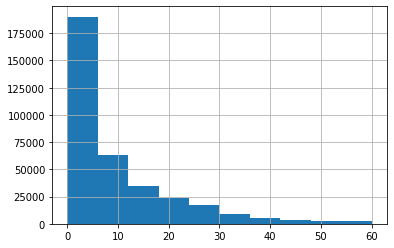

In [27]:
visits['session_dur'].hist(range=(0,60))

In [28]:
#Если выкинуть самые короткие сессии
visits[visits['session_dur']>0.1]['session_dur'].mean()

11.90282526379979

<div style="border:solid grey 2px; padding: 30px">
    Среднее за анализируемый период дневное количество активных пользователей - 0,9 тыс., недельное - 5,7 тыс., месячное - 23 тыс. 
Частота захода на сайт активного пользователя в среднем составляет от 1 раз в месяц до 1 раза в неделю.<br>
В 2018 году удалось заметно улучшить ползовательскую активность по сравнению с 2017 годом. При этом, как и ожидалось в соответствии с общим трендом, количество активных пользоватателей мобильных девайсов растет значительно быстрее, чем десктопных. Но даже при этом доля дневного количества пользователей мобильных девайсов за 2018 года составила 29% от общего количества.<br>
В среднем пользователи делают одну сессию в день длительностью 10 минут. (если не учитывать сессии короче 0,1 минуты, то 12 минут)


## <span style="color:orange">Что можно улучшить<span>
Используемый тобой метод `seconds` отлично работает, если есть уверенность, что даты правильные (дата окончания больше даты начала), в противном случае метод возвращает кол-во секунд в одном дне.

Посмотри на метод `total_seconds()` - он в любом случаем возвращает кол-во секунд. Попробуй сравнить оба метода, думаю, найдется интересная информация о данных.
    
Чтобы понять релевантна ли оценка средним, предлагаю построить распределение длительности сессий

#### Retention Rate

In [29]:
activation_date = visits.groupby('uid')['start_ts'].min().reset_index()
activation_date.columns=['uid', 'activation_date']
activation_date

,uid,activation_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [30]:
visits = visits.merge(activation_date,on='uid')

In [31]:
visits['lifetime'] = (visits['start_ts'].astype('datetime64[M]') - visits['activation_date'].astype('datetime64[M]')) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits['activation_YM'] = visits['activation_date'].astype('datetime64[M]')
visits.sample(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_dur,activation_date,lifetime,activation_YM
67520,desktop,2017-07-18 17:23:00,3,2017-07-18 16:24:00,3062555734001600152,2017,7,29,2017-07-18,59.0,2017-07-18 16:24:00,0,2017-07-01
32009,desktop,2018-03-07 12:26:00,5,2018-03-07 11:53:00,5101409291528370710,2018,3,10,2018-03-07,33.0,2017-06-02 00:35:00,9,2017-06-01
304284,touch,2018-04-23 12:20:00,2,2018-04-23 11:52:00,11073204800773217114,2018,4,17,2018-04-23,28.0,2018-04-03 12:56:00,0,2018-04-01
353433,desktop,2018-02-07 21:30:00,4,2018-02-07 21:29:00,11047629026204942562,2018,2,6,2018-02-07,1.0,2018-02-07 21:29:00,0,2018-02-01
91139,touch,2017-10-24 00:41:00,1,2017-10-24 00:41:00,6434495750856029650,2017,10,43,2017-10-24,0.0,2017-10-22 09:17:00,0,2017-10-01
162918,desktop,2017-10-01 14:51:00,4,2017-10-01 14:49:00,14627582027053719626,2017,10,39,2017-10-01,2.0,2017-10-01 14:49:00,0,2017-10-01
65201,touch,2017-07-09 22:45:00,5,2017-07-09 22:29:00,6581298000271672269,2017,7,27,2017-07-09,16.0,2017-07-09 22:29:00,0,2017-07-01
4983,desktop,2017-08-16 15:18:00,1,2017-08-16 14:20:00,14435995954877181653,2017,8,33,2017-08-16,58.0,2017-06-01 10:57:00,2,2017-06-01
1529,desktop,2017-07-13 09:54:00,1,2017-07-13 09:45:00,3263486045884611639,2017,7,28,2017-07-13,9.0,2017-06-01 08:51:00,1,2017-06-01
255885,touch,2017-10-05 14:45:00,4,2017-10-05 14:42:00,7878063567929319498,2017,10,40,2017-10-05,3.0,2017-10-05 14:42:00,0,2017-10-01


In [32]:
cohorts = visits.groupby(['activation_YM','lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,activation_YM,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [33]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['activation_YM','uid']].rename(columns={'uid':'cohort_users'})
initial_users_count

,activation_YM,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [34]:
cohorts = cohorts.merge(initial_users_count,on='activation_YM')


In [35]:
cohorts

,activation_YM,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [36]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='activation_YM',columns='lifetime',values='retention',aggfunc='sum')

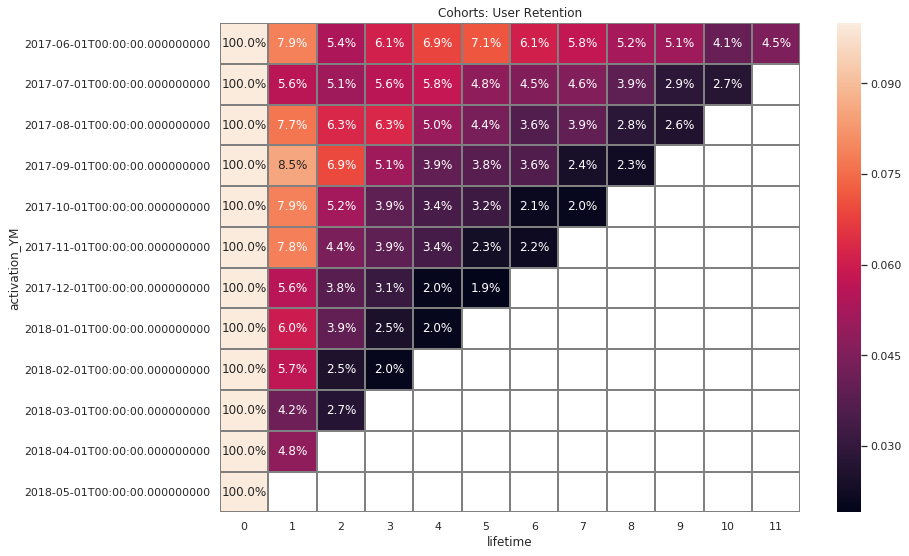

In [37]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1);

<div style="border:solid grey 2px; padding: 30px">
После первого месяца в сервисе остается только около 8% процентов от изначального колиечства пользователей.

### Продажи

#### Когда пользователь делает первую покупку?

In [38]:
orders = orders.merge(activation_date, on='uid')

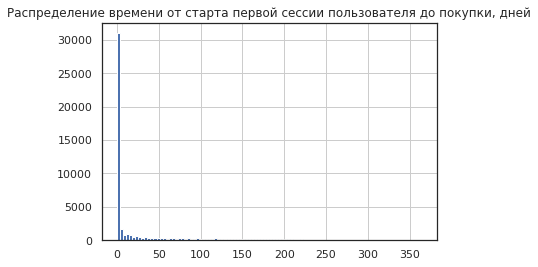

In [39]:
orders['buy_time'] = (orders['buy_ts'] - orders['activation_date']).dt.days
orders['buy_time'].hist(bins=100)
plt.title('Распределение времени от старта первой сессии пользователя до покупки, дней')
plt.show()

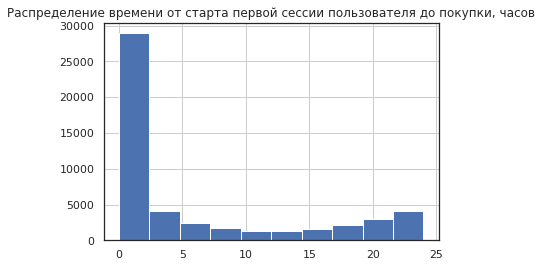

In [40]:
orders['buy_time'] = (orders['buy_ts'] - orders['activation_date']).dt.seconds/3600
orders['buy_time'].hist()
plt.title('Распределение времени от старта первой сессии пользователя до покупки, часов')
plt.show()

Подавляющее большинство пользователей совершают покупку в первый час с начала первой сессии.

#### Количество и частота продаж

In [41]:

print('\033[1m' + 'Среднее количество продаж по годам (7 мес. 2017 г. и 5 мес. 2018 г.)')
orders.groupby('buy_year')['buy_ts'].count().reset_index()

Среднее количество продаж по годам (7 мес. 2017 г. и 5 мес. 2018 г.)


,buy_year,buy_ts
0,2017,27467
1,2018,22948


    Среднее количество продаж по месяцам


,buy_year,buy_month,buy_ts,y_m
0,2017,6,2354,2017-6
1,2017,7,2363,2017-7
2,2017,8,1807,2017-8
3,2017,9,3387,2017-9
4,2017,10,5679,2017-10
5,2017,11,5659,2017-11
6,2017,12,6218,2017-12
7,2018,1,4721,2018-1
8,2018,2,5281,2018-2
9,2018,3,5326,2018-3


3878.076923076923

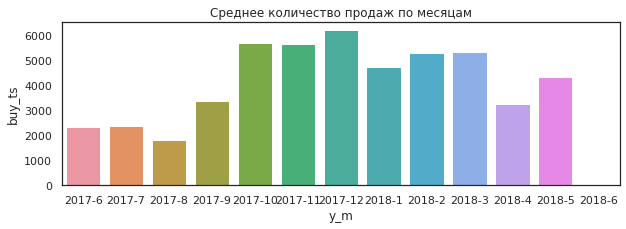

In [42]:
print('\033[1m' + '    Среднее количество продаж по месяцам')
buy_month_count = orders.groupby(['buy_year', 'buy_month'])['buy_ts'].count().reset_index()
buy_month_count['y_m'] = buy_month_count['buy_year'].astype('str') + '-' + buy_month_count['buy_month'].astype('str')
display(buy_month_count)
display(buy_month_count['buy_ts'].mean())

sns.barplot(data = buy_month_count
            ,x = 'y_m'
            ,y = 'buy_ts')
fig = plt.gcf()
plt.title('Среднее количество продаж по месяцам')
fig.set_size_inches(10, 3)
plt.show()

<div style="border:solid grey 2px; padding: 30px">
В месяц совершается в среднем около 4 тыс. покупок. В рамках анализируемого периода тренд данной величины непонятен.

    Среднее количество продаж по неделям


,buy_year,buy_week,buy_ts,y_w
0,2017,22,340,2017-22
1,2017,23,938,2017-23
2,2017,24,343,2017-24
3,2017,25,371,2017-25
4,2017,26,460,2017-26
5,2017,27,477,2017-27
6,2017,28,636,2017-28
7,2017,29,716,2017-29
8,2017,30,381,2017-30
9,2017,31,314,2017-31


951.2264150943396

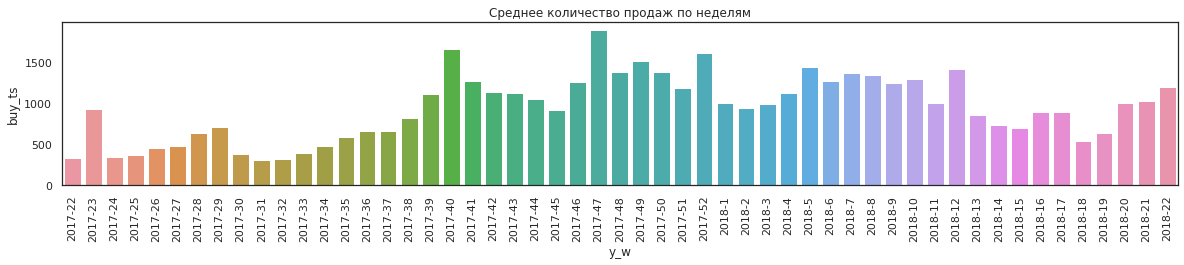

In [43]:
print('\033[1m' + '    Среднее количество продаж по неделям')
buy_week_count = orders.groupby(['buy_year', 'buy_week'])['buy_ts'].count().reset_index()
buy_week_count['y_w'] = buy_week_count['buy_year'].astype('str') + '-' + buy_week_count['buy_week'].astype('str')
display(buy_week_count)
display(buy_week_count['buy_ts'].mean())

ax = sns.barplot(data = buy_week_count
            ,x = 'y_w'
            ,y = 'buy_ts')
fig = plt.gcf()
plt.title('Среднее количество продаж по неделям')
fig.set_size_inches(20, 3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Картинка по неделям ничего нового не дала. Видим, что количество недельных продаж колеблиться в районе 950.

In [44]:
print('\033[1m' + '    Среднее количество продаж по месяцам')
buy_month_count = orders[orders['buy_year']==2017].groupby(['buy_year', 'buy_month'])['buy_ts'].count().reset_index()
buy_month_count['y_m'] = buy_month_count['buy_year'].astype('str') + '-' + buy_month_count['buy_month'].astype('str')
display(buy_month_count)
display(buy_month_count['buy_ts'].mean())

    Среднее количество продаж по месяцам


,buy_year,buy_month,buy_ts,y_m
0,2017,6,2354,2017-6
1,2017,7,2363,2017-7
2,2017,8,1807,2017-8
3,2017,9,3387,2017-9
4,2017,10,5679,2017-10
5,2017,11,5659,2017-11
6,2017,12,6218,2017-12


3923.8571428571427

Среднее количество продаж по месяцам на мобильных устройствах


,buy_year,buy_month,buy_ts,y_m
0,2017,6,360,2017-6
1,2017,7,474,2017-7
2,2017,8,313,2017-8
3,2017,9,626,2017-9
4,2017,10,1055,2017-10
5,2017,11,1057,2017-11
6,2017,12,1185,2017-12
7,2018,1,898,2018-1
8,2018,2,1096,2018-2
9,2018,3,1061,2018-3


790.6666666666666

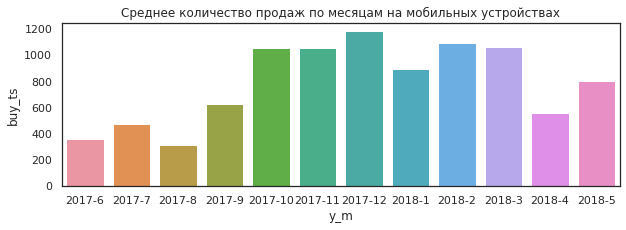

In [45]:
print('\033[1m' + 'Среднее количество продаж по месяцам на мобильных устройствах')
buy_month_count_touch = orders[orders['device']=='touch'].groupby(['buy_year', 'buy_month'])['buy_ts'].count().reset_index()
buy_month_count_touch['y_m'] = buy_month_count_touch['buy_year'].astype('str') + '-' + buy_month_count_touch['buy_month'].astype('str')
display(buy_month_count_touch)
display(buy_month_count_touch['buy_ts'].mean())

sns.barplot(data = buy_month_count_touch
            ,x = 'y_m'
            ,y = 'buy_ts')
fig = plt.gcf()
plt.title('Среднее количество продаж по месяцам на мобильных устройствах')
fig.set_size_inches(10, 3)
plt.show()

По продажам с мобильных устройств тренд такой же как и общий.

In [46]:
print('\033[1m' + '    Среднее количество продаж по источникам рекламы')
buy_source_count = orders.groupby(['source_id'])['buy_ts'].count().reset_index()

buy_source_count = buy_source_count.merge(sources_count, on="source_id")
buy_source_count['buyers_pct'] = buy_source_count['buy_ts'] / buy_source_count['uid']

display(buy_source_count.sort_values('buyers_pct', ascending=False))
display(buy_source_count['buy_ts'].mean())


    Среднее количество продаж по источникам рекламы


,source_id,buy_ts,uid,buyers_pct
0,1,5223,9469,0.551589
1,2,6392,17616,0.362852
6,9,1647,6448,0.255428
7,10,1562,6903,0.226278
2,3,13289,66116,0.200995
4,5,9406,49237,0.191035
3,4,12895,72346,0.178241
5,7,1,32,0.031250


6301.875

In [47]:
orders.groupby('device')['buy_ts'].count().reset_index()

,device,buy_ts
0,desktop,40927
1,touch,9488


<div style="border:solid grey 2px; padding: 30px">
В итоге: продажи не растут, даже при росте количества активных пользоватлей, и даже на мобильных устройствах.<br>
Самая платящие пользователи из источника рекламы 1, наименее платящие из источников 3,4,5.

#### Смотрим средний чек

In [48]:
AOV = orders.groupby(['buy_year', 'buy_month'])['revenue'].agg(['count', 'sum']).reset_index().head(12)
AOV['AOV'] = round((AOV['sum'] / AOV['count']), 1)
AOV['y_m'] = AOV['buy_year'].astype('str') + '-' + AOV['buy_month'].astype('str')
AOV

,buy_year,buy_month,count,sum,AOV,y_m
0,2017,6,2354,9557.49,4.1,2017-6
1,2017,7,2363,12539.47,5.3,2017-7
2,2017,8,1807,8758.78,4.8,2017-8
3,2017,9,3387,18345.51,5.4,2017-9
4,2017,10,5679,27987.70,4.9,2017-10
5,2017,11,5659,27069.93,4.8,2017-11
6,2017,12,6218,36388.60,5.9,2017-12
7,2018,1,4721,19417.13,4.1,2018-1
8,2018,2,5281,25560.54,4.8,2018-2
9,2018,3,5326,28834.59,5.4,2018-3


In [49]:
s = round(orders['revenue'].mean(), 1 )
s17 = round(orders[orders['buy_year']==2017]['revenue'].mean(), 1 )
s18 = round(orders[orders['buy_year']==2018]['revenue'].mean(), 1 )
print(f'\033[1m' + f'Средний чек за весь период составил {s} тыс. руб.')
print(f'\033[1m' + f'Средний чек за 2017 год составил {s17} тыс. руб.')
print(f'\033[1m' + f'Средний чек за 2018 год составил {s18} тыс. руб.')

Средний чек за весь период составил 5.0 тыс. руб.
Средний чек за 2017 год составил 5.1 тыс. руб.
Средний чек за 2018 год составил 4.9 тыс. руб.


In [50]:
AOV2 = orders.groupby('source_id')['revenue'].agg(['count', 'sum']).reset_index()
AOV2['AOV'] = round((AOV2['sum'] / AOV2['count']), 1)
AOV2.sort_values('AOV', ascending=False)

,source_id,count,sum,AOV
1,2,6392,46923.61,7.3
0,1,5223,31090.55,6.0
4,5,9406,52624.02,5.6
3,4,12895,56696.83,4.4
2,3,13289,54511.24,4.1
6,9,1647,5759.40,3.5
7,10,1562,4450.33,2.8
5,7,1,1.22,1.2


In [51]:
AOV3 = orders.groupby('device')['revenue'].agg(['count', 'sum']).reset_index()
AOV3['AOV'] = round((AOV3['sum'] / AOV3['count']), 1)

AOV3_17 = orders[orders['buy_year']==2017].groupby('device')['revenue'].agg(['count', 'sum']).reset_index()
AOV3_17['AOV_17'] = round((AOV3_17['sum'] / AOV3_17['count']), 1)

AOV3_18 = orders[orders['buy_year']==2018].groupby('device')['revenue'].agg(['count', 'sum']).reset_index()
AOV3_18['AOV_18'] = round((AOV3_18['sum'] / AOV3_18['count']), 1)
AOV3 = AOV3.merge(AOV3_17, on='device').merge(AOV3_18, on='device')
AOV3
AOV3.sort_values('AOV', ascending=False)

,device,count_x,sum_x,AOV,count_y,sum_y,AOV_17,count,sum,AOV_18
0,desktop,40927,211329.77,5.2,22397,118357.05,5.3,18530,92972.72,5.0
1,touch,9488,40727.43,4.3,5070,22290.43,4.4,4418,18437.00,4.2


Средний чек, так же как и продажи, почти не изменился год к году. <br>
Средний чек довольно сильно различается по источникам рекламы (от 4,1 тыс. руб. по источнику 3, до 7,3 ытс. руб. по источнику 2).<br>
Также видно, что средний чек по дестктопным устройствам на 21% выше, чем по мобильным устройствам.

## <span style="color:green">Отличная работа<span>
В разделе все верно!

Здорово, что ты рассмотрел метрики в разрезе года

#### LTV

In [52]:
round(orders.groupby('uid')['revenue'].sum().reset_index()['revenue'].mean(), 1)


6.9

In [53]:
a = orders.groupby('uid').agg({'revenue': 'sum','source_id': 'first'}).reset_index().groupby('source_id')['revenue'].agg(['sum', 'count']).reset_index()
a['LTV'] = round((a['sum'] / a['count']), 1)
a.sort_values('LTV', ascending=False)

,source_id,sum,count,LTV
1,2,46923.61,3506,13.4
0,1,31090.55,2899,10.7
4,5,52624.02,6931,7.6
3,4,56696.83,10296,5.5
6,9,5759.40,1088,5.3
2,3,54511.24,10473,5.2
7,10,4450.33,1329,3.3
5,7,1.22,1,1.2


In [54]:
round(orders[orders['device']=='touch'].groupby('uid')['revenue'].sum().reset_index()['revenue'].mean(), 1)

5.6

In [55]:
round(orders[orders['device']=='desktop'].groupby('uid')['revenue'].sum().reset_index()['revenue'].mean(), 1)

7.2

<div style="border:solid grey 2px; padding: 30px">
    Средний LTV составляет 6,9 тыс руб. При этом значение LTV довольно сильно отчличается источникам рекламы, наибольшее LTV у пользователей из источников 2, 1, наименьшее - из исчтоников 10, 4, 9 ,3.<br>
По устройствам картина с LTV такая же как и со средним чеком: LTV клиентов с дектопа больше на 29% процентов, чем с мобильных устройств.


In [56]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders['first_order_month'] = first_orders['first_order_month'].astype('datetime64[M]')
first_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [57]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
orders = pd.merge(orders,first_orders, on='uid')

In [58]:
orders['lifetime'] = (orders['buy_ts'].astype('datetime64[M]') - orders['first_order_month']) / np.timedelta64(1, 'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')
orders.sample(10)

,buy_ts,revenue,uid,buy_year,buy_month,buy_week,source_id,device,activation_date,buy_time,first_order_month,lifetime
46787,2018-04-26 15:00:00,2.44,9736532120699723408,2018,4,17,3,touch,2018-04-26 14:52:00,0.133333,2018-04-01,0
33910,2018-01-22 13:49:00,0.73,9330346763462714639,2018,1,4,2,desktop,2018-01-22 12:37:00,1.200000,2018-01-01,0
33239,2018-01-16 17:17:00,1.71,14395979335061332647,2018,1,3,3,touch,2018-01-16 17:17:00,0.000000,2018-01-01,0
29753,2017-12-24 21:45:00,7.78,10250267764213849985,2017,12,51,3,touch,2017-12-24 21:35:00,0.166667,2017-12-01,0
18782,2018-04-04 17:07:00,17.35,11787127951829387860,2018,4,14,4,desktop,2017-10-27 22:44:00,18.383333,2017-10-01,6
29840,2017-12-25 14:47:00,3.67,16090199336781843203,2017,12,52,4,desktop,2017-12-20 12:48:00,1.983333,2017-12-01,0
12772,2017-09-27 18:56:00,4.89,8106704914757275229,2017,9,39,5,touch,2017-08-10 16:42:00,2.233333,2017-09-01,0
22709,2017-12-15 12:28:00,9.78,11680900754697023979,2017,12,50,1,desktop,2017-06-03 10:01:00,2.450000,2017-11-01,1
34040,2018-01-23 07:36:00,11.08,6921387353630298346,2018,1,4,5,desktop,2018-01-23 07:34:00,0.033333,2018-01-01,0
1300,2017-08-18 11:52:00,2.75,13888745432979765063,2017,8,33,1,desktop,2017-06-05 11:22:00,0.500000,2017-06-01,2


In [59]:
cohorts = orders.groupby(['first_order_month','lifetime']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')


In [60]:
report

,first_order_month,uid,lifetime,revenue
0,2017-06-01,2023,0,9557.49
1,2017-06-01,2023,1,981.82
2,2017-06-01,2023,2,885.34
3,2017-06-01,2023,3,1931.30
4,2017-06-01,2023,4,2068.58
...,...,...,...,...
74,2018-03-01,3533,2,1114.87
75,2018-04-01,2276,0,10600.69
76,2018-04-01,2276,1,1209.92
77,2018-05-01,2988,0,13925.76


In [61]:
report['ltv'] = report['revenue'] / report['uid']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='ltv', 
        aggfunc='mean').round(1)
output = output.cumsum(axis=1).round(2)
output = output.fillna('')
output

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.7,5.2,5.6,6.6,7.6,8.3,9.3,9.9,10.5,11.1,11.7,12
2017-07-01,6.0,6.3,6.9,7.3,7.5,7.7,7.8,7.9,8.1,8.2,8.4,
2017-08-01,5.3,5.8,6.3,6.7,7.2,7.5,7.7,8.1,8.4,8.6,,
2017-09-01,5.6,6.7,7.2,11.2,11.6,12.2,12.9,13.1,13.3,,,
2017-10-01,5.0,5.5,5.7,5.9,6.1,6.2,6.3,6.4,,,,
2017-11-01,5.2,5.6,5.8,6.1,6.2,6.3,6.4,,,,,
2017-12-01,4.7,5,5.9,7,7.3,7.6,,,,,,
2018-01-01,4.1,4.4,4.7,4.8,4.9,,,,,,,
2018-02-01,4.2,4.5,4.6,4.7,,,,,,,,


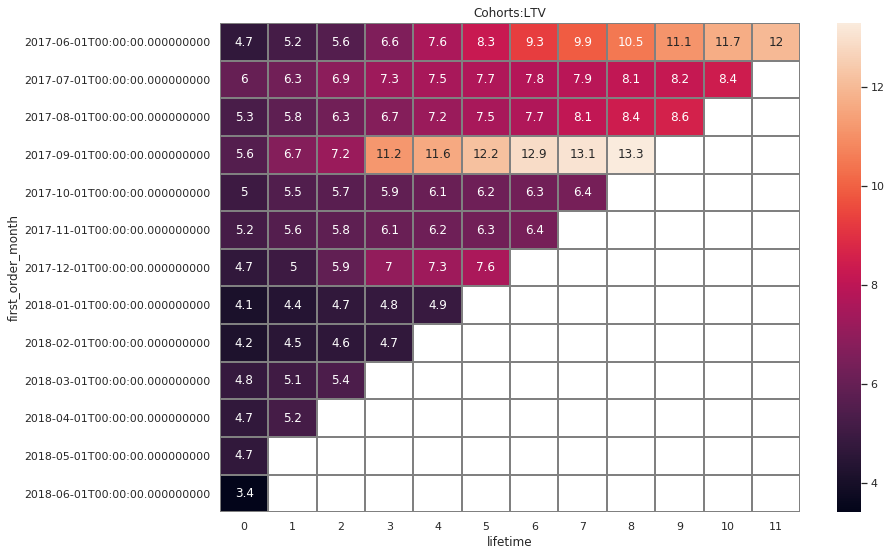

In [62]:
output = report.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='ltv', 
        aggfunc='mean').round(1)
output = output.cumsum(axis=1).round(1)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts:LTV')
sns.heatmap(output, annot=True, fmt='g', linewidths=1, linecolor='gray');

<div style="border:solid grey 2px; padding: 30px">
В основном, большая часть LTV - первая покупка. <br>
Наиболее "удачная" когорта, в которой были повторные покупки - 09-2017 - нужно выяснить причину. Послее нее идет первая - 2017-6.

#### Смотрим затраты на маркетинг

In [63]:
costs['costs'].sum()

329131.62

In [64]:
cost_buy_month = costs.groupby(['cost_year', 'cost_month'])['costs'].sum().reset_index()
cost_buy_month['y_m'] = cost_buy_month['cost_year'].astype('str') + '-' + cost_buy_month['cost_month'].astype('str')
cost_buy_month

,cost_year,cost_month,costs,y_m
0,2017,6,18015.00,2017-6
1,2017,7,18240.59,2017-7
2,2017,8,14790.54,2017-8
3,2017,9,24368.91,2017-9
4,2017,10,36322.88,2017-10
5,2017,11,37907.88,2017-11
6,2017,12,38315.35,2017-12
7,2018,1,33518.52,2018-1
8,2018,2,32723.03,2018-2
9,2018,3,30415.27,2018-3


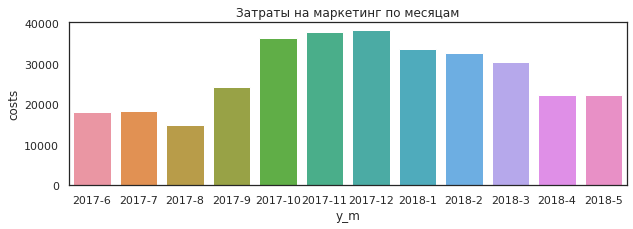

In [65]:
sns.barplot(data = cost_buy_month
            ,x = 'y_m'
            ,y = 'costs')
fig = plt.gcf()
plt.title('Затраты на маркетинг по месяцам')
fig.set_size_inches(10, 3)
plt.show()

<div style="border:solid grey 2px; padding: 30px">Динамика по маркетингу коррелирует с количеством продаж. Из этого можно сделать качественный вывод о том, что маркетинговые кампании работают. И вновь привлеченные пользователи сразу же конвертируются в продажи (график средних месячных продаж "не отстает" от графика затрат).

In [66]:
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()
source_costs_2017 = costs[costs['cost_year']==2017].groupby('source_id')['costs'].sum().reset_index()
source_costs_2017.columns=['source_id', 'costs2017']
source_costs_2018 = costs[costs['cost_year']==2018].groupby('source_id')['costs'].sum().reset_index()
source_costs_2018.columns=['source_id', 'costs2018']
source_costs = source_costs.merge(source_costs_2017, on='source_id').merge(source_costs_2018, on='source_id')
source_costs.sort_values('costs', ascending=False)

,source_id,costs,costs2017,costs2018
2,3,141321.63,80495.21,60826.42
3,4,61073.60,34944.28,26129.32
4,5,51757.10,29613.94,22143.16
1,2,42806.04,24547.68,18258.36
0,1,20833.27,11754.42,9078.85
6,10,5822.49,3402.74,2419.75
5,9,5517.49,3202.88,2314.61


<div style="border:solid grey 2px; padding: 30px">Наибольшие затраты были произведены на истоник 3, далее - на источники 5,2,1. <br>
Также в 2018 году сумма затрат была снижена со 188 млн руб. до 141 млн руб.

In [67]:
source_costs = source_costs.merge(sources_count, on='source_id')

source_costs = source_costs.merge(a, on='source_id')
source_costs['CAC'] = source_costs['costs'] / source_costs['count']


In [68]:
costs.groupby('cost_year')['costs'].sum()

cost_year
2017    187961.15
2018    141170.47
Name: costs, dtype: float64

#### Считаем эффективность затрат

In [69]:
source_costs['ROI'] = (source_costs['LTV'] - source_costs['CAC']) / source_costs['CAC']
source_costs.sort_values("ROI",ascending=False)

,source_id,costs,costs2017,costs2018,uid,sum,count,LTV,CAC,ROI
0,1,20833.27,11754.42,9078.85,9469,31090.55,2899,10.7,7.186364,0.488931
1,2,42806.04,24547.68,18258.36,17616,46923.61,3506,13.4,12.209367,0.097518
5,9,5517.49,3202.88,2314.61,6448,5759.40,1088,5.3,5.071222,0.045113
4,5,51757.10,29613.94,22143.16,49237,52624.02,6931,7.6,7.467479,0.017746
3,4,61073.60,34944.28,26129.32,72346,56696.83,10296,5.5,5.931779,-0.072791
6,10,5822.49,3402.74,2419.75,6903,4450.33,1329,3.3,4.381106,-0.246766
2,3,141321.63,80495.21,60826.42,66116,54511.24,10473,5.2,13.493901,-0.614641


In [70]:
roi = ( orders['revenue'].sum() - costs['costs'].sum() ) / costs['costs'].sum()
roi

-0.2341750695360111

In [71]:
costs['YM'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('YM').sum()
monthly_costs

,source_id,costs,cost_year,cost_month,cost_week
YM,,,,,
2017-06-01,1020,18015.00,423570,1260,5054
2017-07-01,1054,18240.59,437689,1519,6167
2017-08-01,1054,14790.54,437689,1736,7133
2017-09-01,1020,24368.91,423570,1890,7812
2017-10-01,1054,36322.88,437689,2170,9023
2017-11-01,1020,37907.88,423570,2310,9646
2017-12-01,1054,38315.35,437689,2604,10906
2018-01-01,1054,33518.52,437906,217,595
2018-02-01,952,32723.03,395528,392,1358


In [72]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='YM')
report_new['cac'] = report_new['costs'] / report_new['uid']
report_new.head()

,first_order_month,uid,lifetime,revenue,ltv,source_id,costs,cost_year,cost_month,cost_week,cac
0,2017-06-01,2023,0,9557.49,4.724414,1020,18015.0,423570,1260,5054,8.905091
1,2017-06-01,2023,1,981.82,0.485329,1020,18015.0,423570,1260,5054,8.905091
2,2017-06-01,2023,2,885.34,0.437637,1020,18015.0,423570,1260,5054,8.905091
3,2017-06-01,2023,3,1931.30,0.954671,1020,18015.0,423570,1260,5054,8.905091
4,2017-06-01,2023,4,2068.58,1.022531,1020,18015.0,423570,1260,5054,8.905091


In [73]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output2 = report_new.pivot_table(
        index='first_order_month', 
        columns='lifetime', 
        values='romi', 
        aggfunc='mean')
output2 = output2.cumsum(axis=1).round(2)
output2

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


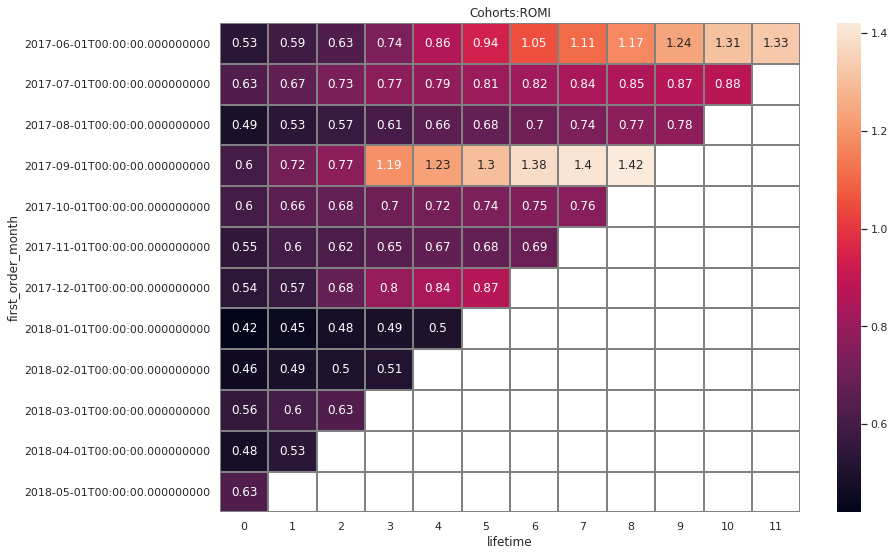

In [74]:


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts:ROMI')
sns.heatmap(output2, annot=True, fmt='g', linewidths=1, linecolor='gray');

<div style="border:solid grey 2px; padding: 30px">Наибольшие затраты были произведены на истоник 3, далее - на источники 5,2,1. <br>Совокупный показатель ROI составляет -23%. <br>Основной фактор, за счет которого формируется отрицательное значение - затраты на исчтоник рекламы 3. За анализируемый период финансовый результат по клиентам из источника 3 составил -87 млн руб.<br>
Наиболее эффективные затраты были в источник 1.<br>
По когортам и лайфтайму распределение аналогично распределению LTV.

## Общий вывод

<br>Целью исследования было дать рекоменации по оптимизации маркетинговых затрат (выбор оптимального рекламного источника и др.) для Яндекс.Афиши на основании анализа данных за 2017 - 2018 гг. (7 мес. и 5 мес., соответственно).<BR><BR>
За отчетный период проект получил отрицательынй фин. результат в размере -77 млн руб. При этом выручка составила 252 млн руб. <BR>
Выручка была сформирвоана за счет 50 тыс. заказов 37 тыс. уникальных пользователей. Общая посещаемость сайта за анализируемый пеирод составила 359 тыс. сессий и 228 тыс. уникальных пользователей.<br>
Затраты  в размере 359 млн руб. были осущетсвлены на привлечение пользователей из 8 источников (1-5, 9, 10), небольшое число визитов было получено из исчтоников, на которые затраты не осуществлялись (6, 7). <br>
Количество активных пользователей за анализируемый период составило: DAU - 908, WAU - 5 716, MAU - 23 228. Большая часть активных пользователей используют платформу desktop, но количество пользователей платофрмы touch растет быстрее.  <br>
Частота захода на сайт активного пользователя в среднем составляет от 1 раз в месяц до 1 раза в неделю на 1 сессию в день длительностью до 10 минут. После первого месяца теряется примерно 92% процентов пользователей.<BR>
Среднее в месяц количество покупок, совершаемых пользователями, составляет около 4 тыс. Большая часть (>80%) была совершена пользователями с платформы desktop. Подавляющее большинство пользователей совершило первую покупку в течение часа с начала первой сессии. Количество покупок полностью управляется величиной затрат на привлечение пользователей. Наиболе покупающие пользователи приходят из источника 1, наименее - из источников 3,4,5.<br>
Средний чек за анализируемый период составил 5 тыс. руб. (и почти не изменился год к году.) При этом средний чек довольно сильно различается по источникам рекламы (от 4,1 тыс. руб. по источнику 3, до 7,3 ытс. руб. по источнику 2).
Также видно, что средний чек по дестктопным устройствам на 21% выше, чем по мобильным устройствам.<br>
Средний LTV составляет 6,9 тыс руб. При этом значение LTV довольно сильно отчличается источникам рекламы, наибольшее LTV у пользователей из источников 2, 1, наименьшее - из исчтоников 10, 4, 9 ,3. По устройствам картина с LTV такая же как и со средним чеком: LTV клиентов с дектопа больше на 29% процентов, чем с мобильных устройств.В основном, большая часть LTV - первая покупка. 
Наиболее "удачная" когорта, в которой были повторные покупки - 09-2017 - нужно выяснить причину. Послее нее идет первая - 2017-6.<br>
Затраты на привлечение в 2018 году были снижены по сравнению с 2017 на 25% до 141 млн руб. Наибольшие затраты были произведены на истоник 3, далее - на источники 5,2,1.<br>
По кключевому показателю эффективности затрат (ROI) наиболее эффективными являются затраты в источник 1 (ROI 49%), затраты в источники 3, 4, 10 являются контрэффективными (ROI меньше 0). Отрицательный фин. результат был в основном обеспечен, избыточными затратами в источник 3 с ROI -60%.<br>
По когортам и лайфтайму распределение ROMI аналогично распределению LTV.

Рекомендации по проекту оптимизации затрат:
1. Отметить, что эффективность затрат на привлечение клиентов имеет сильную неравномерность по источнику. **Провести повторный анализ эффективности маркетинговых затрарт после получения отчетных данных за август 2018 года.**
2. **Значительно увеличить затраты на привлечение по источнику 1** (наибольший ROI, высокая конверсия).
3. **Значительно снизить затраты на привлечение по источнику 3 за счет экономии по п.2** (сильно отрицательный ROI, большая сумма затрат).
4. **Распределение затрат по другим источникам оставить без имзенений до получения результатов по п.1**

Величину прогнозных маркетинговых затрат за 2018 год сохранить на уровне 2017 года с возможным их увеличением после проведения оптимизации их по исчтоникам и выхода на положительынй финанасовый результат.
<br>В части выбора платформы рекомендуется на текущий момент в фокусе оставить десктопную платформу, как наиболее доходную. Однако следует принять во внимание потенциальный росто пользователей мобильной платформы.<br><br>